In [ ]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime as dt
from datetime import timedelta
import urllib.request

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmet/INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2020_A_31-12-2020.csv', encoding="utf-8", sep =',')
df_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmet/INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2021_A_31-12-2021.csv', encoding="utf-8", sep =',')
df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmet/INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2022_A_31-12-2022.csv', encoding="utf-8", sep =',')
df_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmet/INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2023_A_31-12-2023.csv', encoding="utf-8", sep =',')
df_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmet/INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2024_A_31-12-2024.csv', encoding="utf-8", sep =',')

In [ ]:
df_temperatures = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024])

In [ ]:
df_temperatures.head()

Data  Hora UTC  precipitacao_total_(mm)  \
0  2020/01/01  0000 UTC                      0.0   
1  2020/01/01  0100 UTC                      0.0   
2  2020/01/01  0200 UTC                      0.0   
3  2020/01/01  0300 UTC                      0.0   
4  2020/01/01  0400 UTC                      0.0   

   pressao_atmosferica_estacao_(mB)  \
0                             923.1   
1                             923.7   
2                             923.6   
3                             923.1   
4                             922.6   

   pressao_atmosferica_max_na_hora_anterior_(mB)  \
0                                          923.1   
1                                          923.7   
2                                          923.8   
3                                          923.6   
4                                          923.1   

   pressao_atmosferica_min_na_hora_anterior_(mB)  radiacao_global_(kjm)  \
0                                          922.1                    NaN   
1                                          923.1                    NaN   
2                                          923.6                    NaN   
3                                          923.1                    NaN   
4                                          922.6                    NaN   

   temperatura_ar_bulbo_seco_(c)  temperatura_ponto_orvalho_(c)  \
0                           22.0                           20.5   
1                           22.1                           20.7   
2                           23.2                           20.1   
3                           23.3                           19.5   
4                           22.9                           19.0   

   temperatura_max_ar_na_hora_anterior_(c)  ...  \
0                                     22.2  ...   
1                                     22.3  ...   
2                                     23.5  ...   
3                                     23.6  ...   
4                                     23.6  ...   

   temperatura_max_ar_na_hora_anterior_(c).2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   temperatura_min_ar_na_hora_anterior_(c).2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   temperatura_max_ponto_orvalho_na_hora_anterior_(c).2  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   temperatura_min_ponto_orvalho_na_hora_anterior_(c).2  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   umidade_relativa_max_hora_anterior_(%).2  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   umidade_relativa_min_hora_anterior_(%).2  umidade_relativa_do_ar_(%).2  \
0                                       NaN                           NaN   
1                                       NaN                           NaN   
2                                       NaN                           NaN   
3                                       NaN                           NaN   
4                              

In [ ]:
df_temperatures.dtypes

Data                                              object
Hora UTC                                          object
precipitacao_total_(mm)                          float64
pressao_atmosferica_estacao_(mB)                 float64
pressao_atmosferica_max_na_hora_anterior_(mB)    float64
                                                  ...   
umidade_relativa_min_hora_anterior_(%).2         float64
umidade_relativa_do_ar_(%).2                     float64
vento_direcao_horario_(gr).2                     float64
vento_raja_max_(ms).2                            float64
vento_velocidade_horaria_(ms).2                  float64
Length: 71, dtype: object

In [ ]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.3 MB/s eta 0:00:00


In [ ]:
# carrega arquivo netcdf
from netCDF4 import Dataset
# carrega shapefile
import geopandas as gpd
# plota grid xyz
import matplotlib.pyplot as plt
# manipula matrizes numericamente
import numpy as np

In [ ]:
shapefile_declividade = '/content/drive/MyDrive/Colab Notebooks/inmet/LAYER_GEOTECNICA/DEINFO_DECLIVIDADE.shp'

map_declividade = gpd.read_file(shapefile_declividade)

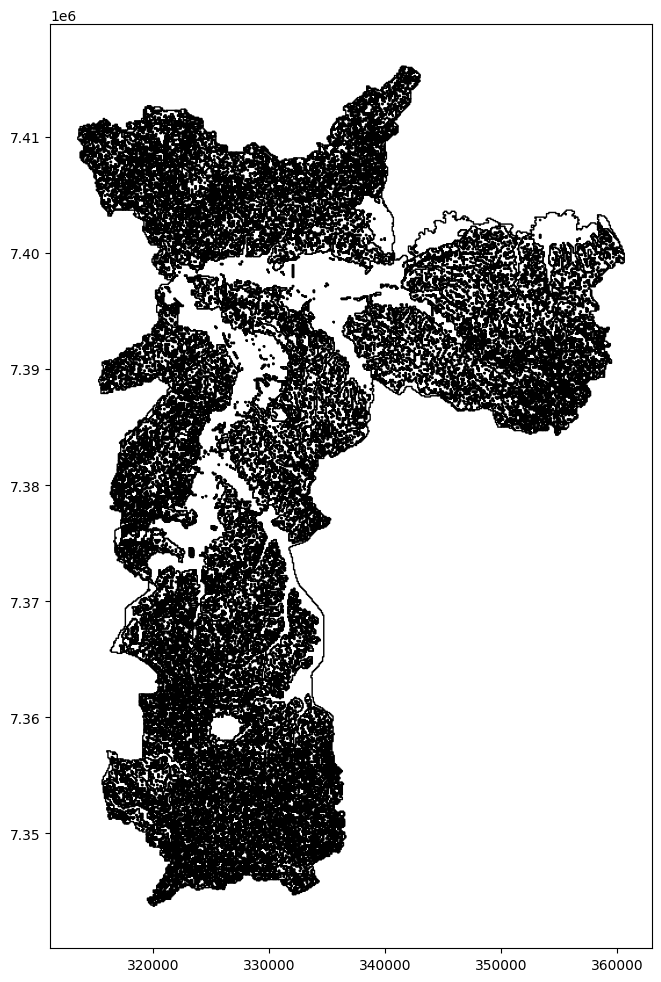

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_declividade.plot(facecolor='none', edgecolor='k', lw =1, ax=ax, legend = True)
plt.show()

In [ ]:
shapefile_geotecnica_area = '/content/drive/MyDrive/Colab Notebooks/inmet/LAYER_GEOTECNICA/DEINFO_GEOTECNICA_AREA.shp'

map_geotecnica_area = gpd.read_file(shapefile_geotecnica_area)

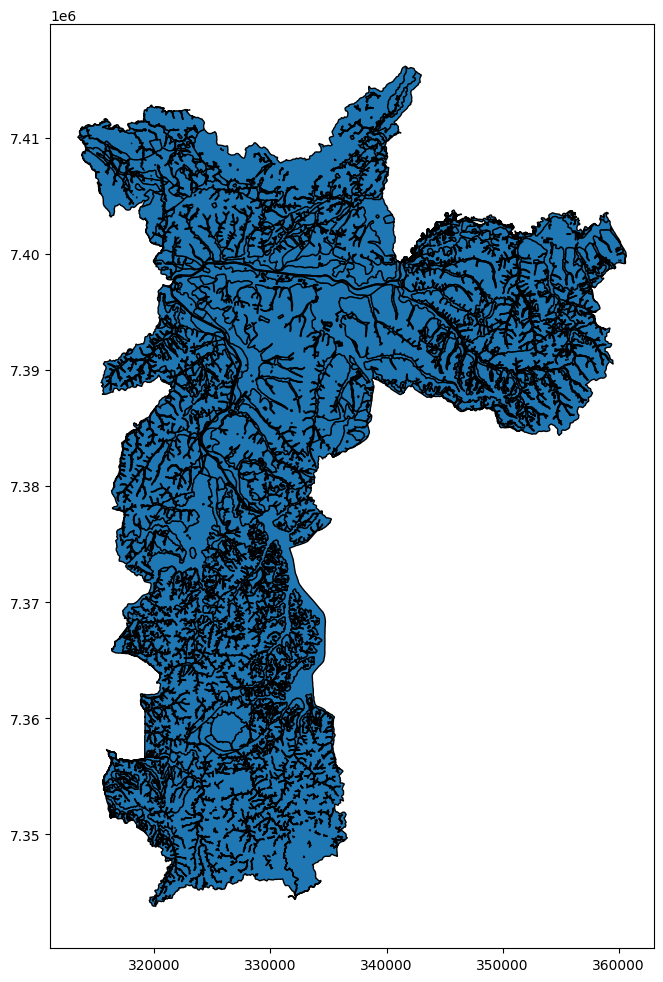

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_geotecnica_area.plot(edgecolor='k', lw =1, ax=ax, legend = True)
plt.show()

In [ ]:
shapefile_geotecnica_linha = '/content/drive/MyDrive/Colab Notebooks/inmet/LAYER_GEOTECNICA/DEINFO_GEOTECNICA_LINHA.shp'

map_geotecnica_linha = gpd.read_file(shapefile_geotecnica_linha)

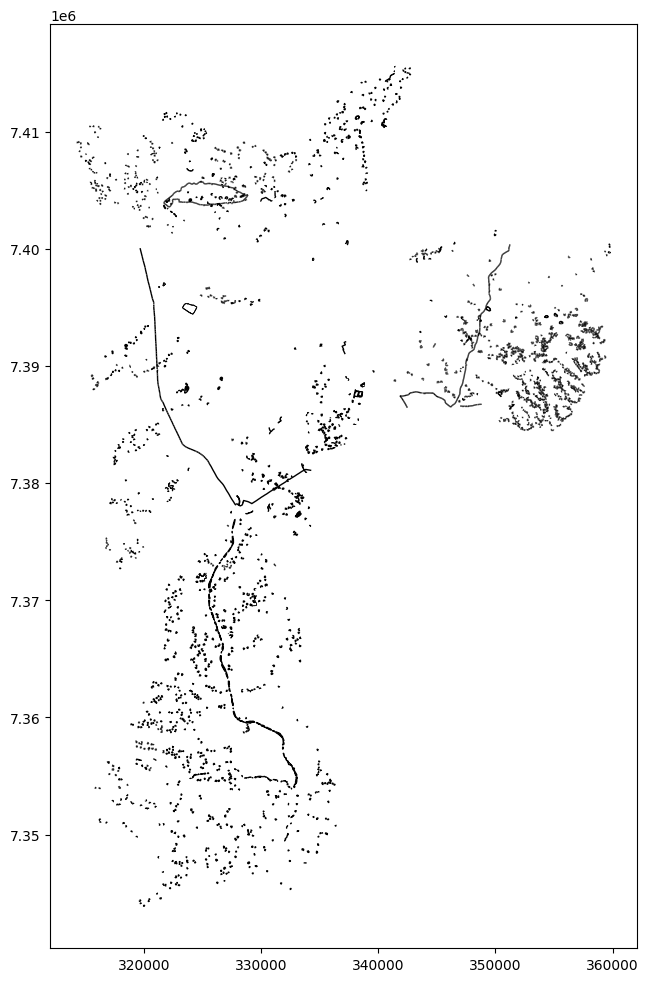

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_geotecnica_linha.plot(facecolor='none', edgecolor='k',lw =1, ax=ax, legend = True)
plt.show()

In [ ]:
shapefile_geotecnica_ponto = '/content/drive/MyDrive/Colab Notebooks/inmet/LAYER_GEOTECNICA/DEINFO_GEOTECNICA_PONTO.shp'

map_geotecnica_ponto = gpd.read_file(shapefile_geotecnica_ponto)

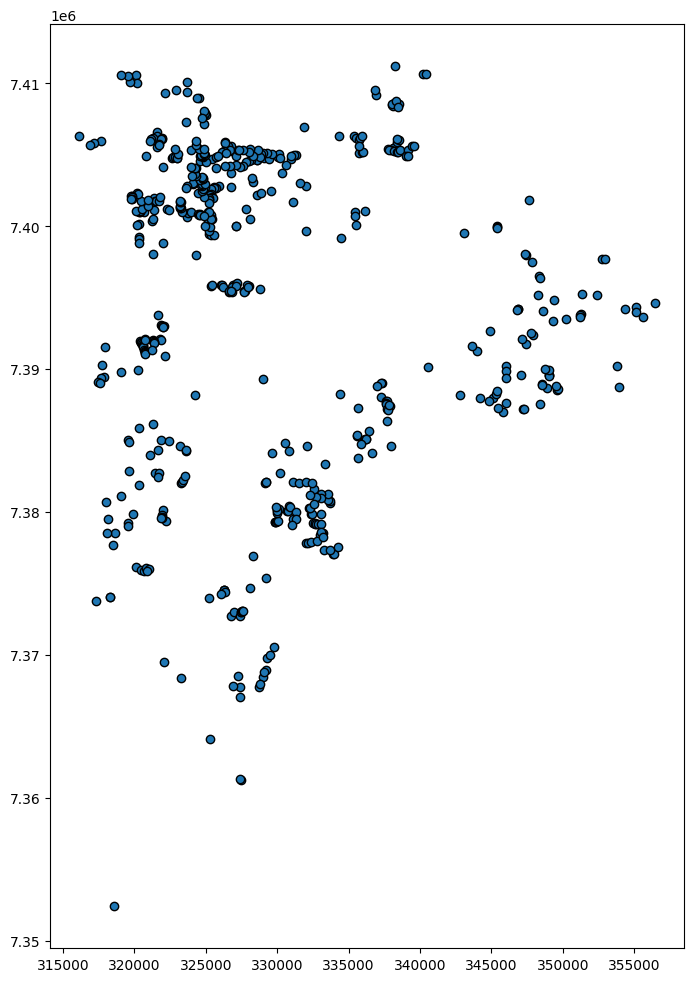

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_geotecnica_ponto.plot(edgecolor='k', lw =1, ax=ax, legend = True)
plt.show()

In [ ]:
shapefile_corticos = '/content/drive/MyDrive/Colab Notebooks/inmet/LAYER_CORTICOS_2015/DEINFO_CORTICO_2015.shp'

map_corticos = gpd.read_file(shapefile_corticos)

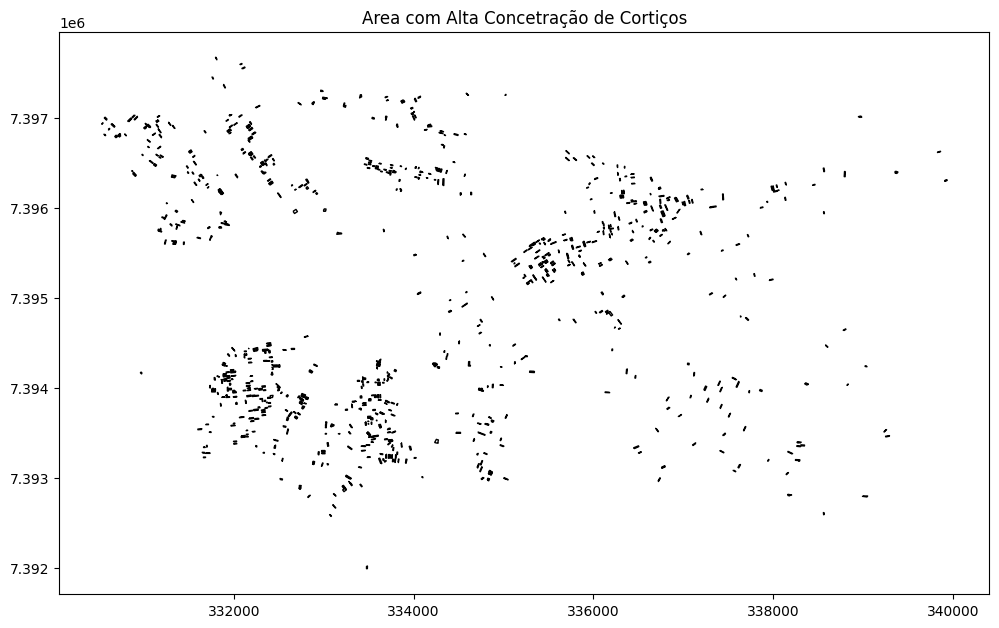

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_corticos.plot(facecolor='none', edgecolor='k', lw =1, ax=ax, legend = True)
ax.set_title('Area com Alta Concetração de Cortiços')
plt.show()

In [ ]:
shapefile_areainundavel = '/content/drive/MyDrive/Colab Notebooks/inmet/SIRGAS_SHP_areainundavel/SIRGAS_SHP_areainundavel/SIRGAS_SHP_areainundavel.shp'

map_areainundavel = gpd.read_file(shapefile_areainundavel)

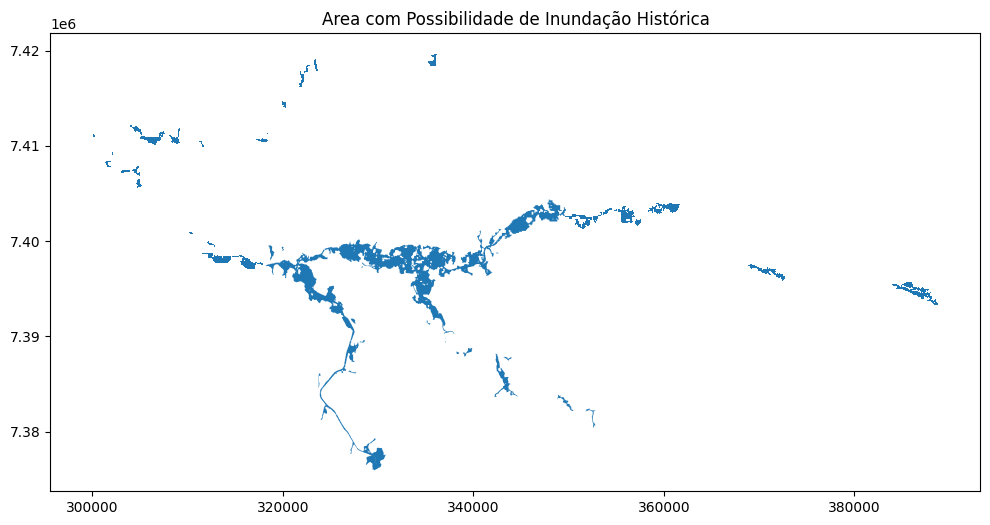

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_areainundavel.plot(lw =1, ax=ax, legend = True)
ax.set_title('Area com Possibilidade de Inundação Histórica')
plt.show()

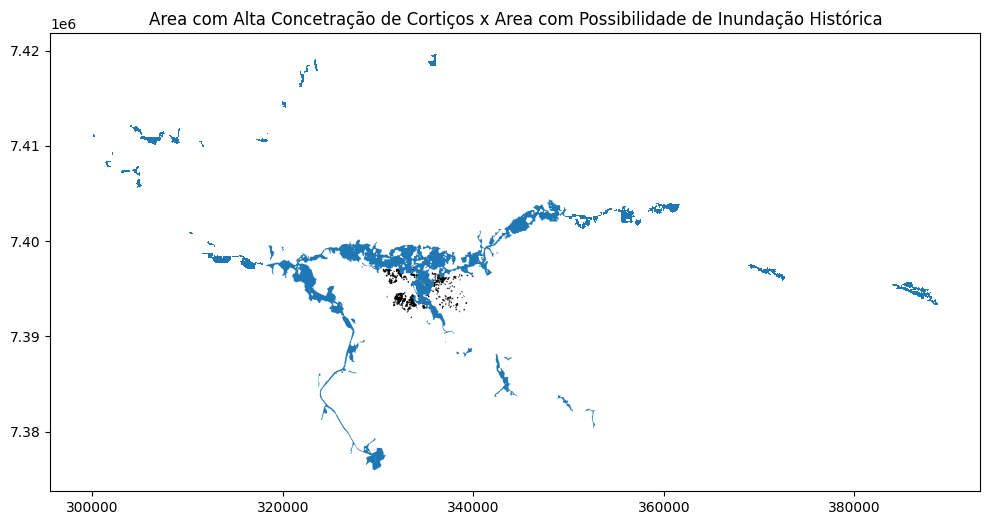

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
map_corticos.plot(facecolor='none', edgecolor='k', lw =1, ax=ax, legend = True)
map_areainundavel.plot(lw =1, ax=ax, legend = True)
ax.set_title('Area com Alta Concetração de Cortiços x Area com Possibilidade de Inundação Histórica')
plt.show()

In [ ]:
shapefile_servicodivisivelagrupamento = '/content/drive/MyDrive/Colab Notebooks/inmet/SIRGAS_SHP_servicodivisivelagrupamento/SIRGAS_SHP_servicodivisivelagrupamento/SIRGAS_SHP_servicodivisivelagrupamento.shp'

mape_servicodivisivelagrupamento = gpd.read_file(shapefile_servicodivisivelagrupamento)

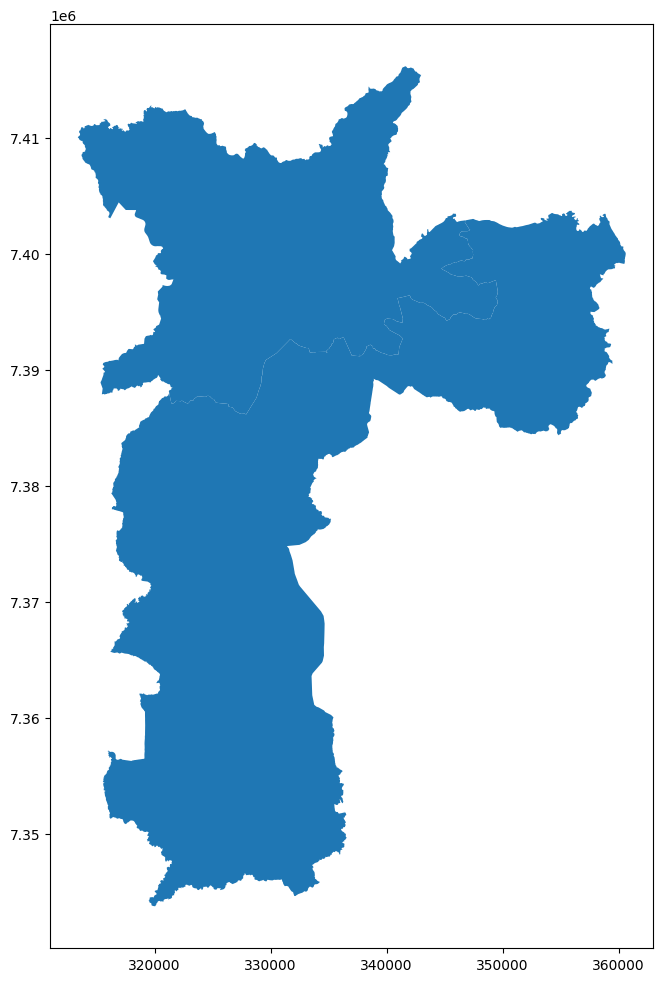

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
mape_servicodivisivelagrupamento.plot(lw =1, ax=ax, legend = True)
plt.show()

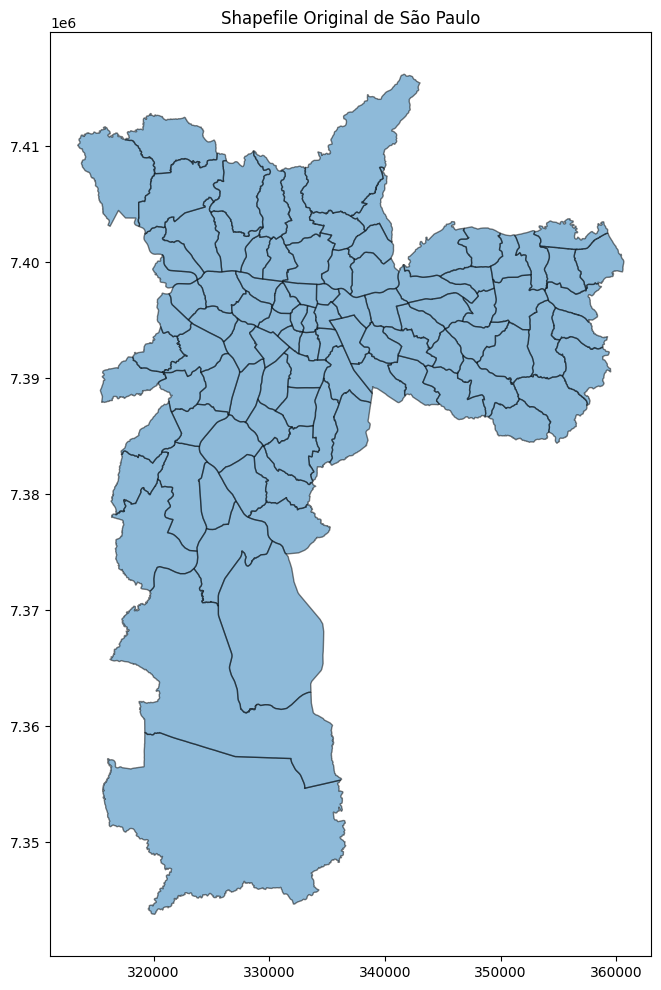

In [83]:
# Plotar o shapefile no CRS original
fig, ax = plt.subplots(figsize=(12, 12))
gdf_sp.plot(ax=ax, edgecolor='k', alpha=0.5)
ax.set_title('Shapefile Original de São Paulo')
plt.show()


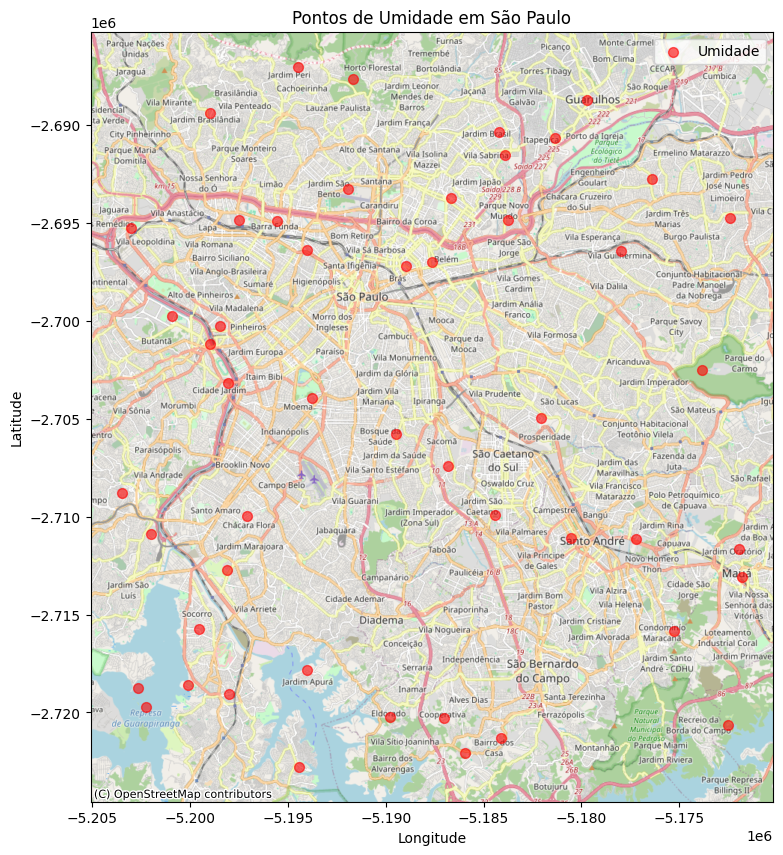

In [80]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Passo 1: Carregar o shapefile
shapefile_path = '/content/SAD69-96_SHP_distrito.shp'
gdf_distritos = gpd.read_file(shapefile_path)

# Verificar e definir CRS se necessário
if gdf_distritos.crs is None:
    gdf_distritos.set_crs(epsg=4326, inplace=True)  # Definir CRS como WGS 84 (EPSG:4326)

# Passo 2: Criar dados de umidade aleatórios
np.random.seed(42)  # Para reprodutibilidade
num_points = 50
longitude = np.random.uniform(-46.75, -46.45, num_points)  # Longitude aproximada de São Paulo
latitude = np.random.uniform(-23.75, -23.45, num_points)  # Latitude aproximada de São Paulo
umidade = np.random.uniform(50, 100, num_points)  # Valores de umidade entre 50% e 100%

# Criar um DataFrame com os dados
df_umidade = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'umidade': umidade
})

# Passo 3: Converter o DataFrame para um GeoDataFrame
geometry = [Point(xy) for xy in zip(df_umidade.longitude, df_umidade.latitude)]
gdf_umidade = gpd.GeoDataFrame(df_umidade, geometry=geometry, crs="EPSG:4326")

# Re-projetar os GeoDataFrames para EPSG:3857 (Web Mercator)
gdf_distritos = gdf_distritos.to_crs(epsg=3857)
gdf_umidade = gdf_umidade.to_crs(epsg=3857)

# Passo 4: Criar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o shapefile dos distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os pontos de umidade
gdf_umidade.plot(ax=ax, color='red', markersize=50, alpha=0.6, label='Umidade')

# Adicionar basemap
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar o título e a legenda
plt.title('Pontos de Umidade em São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


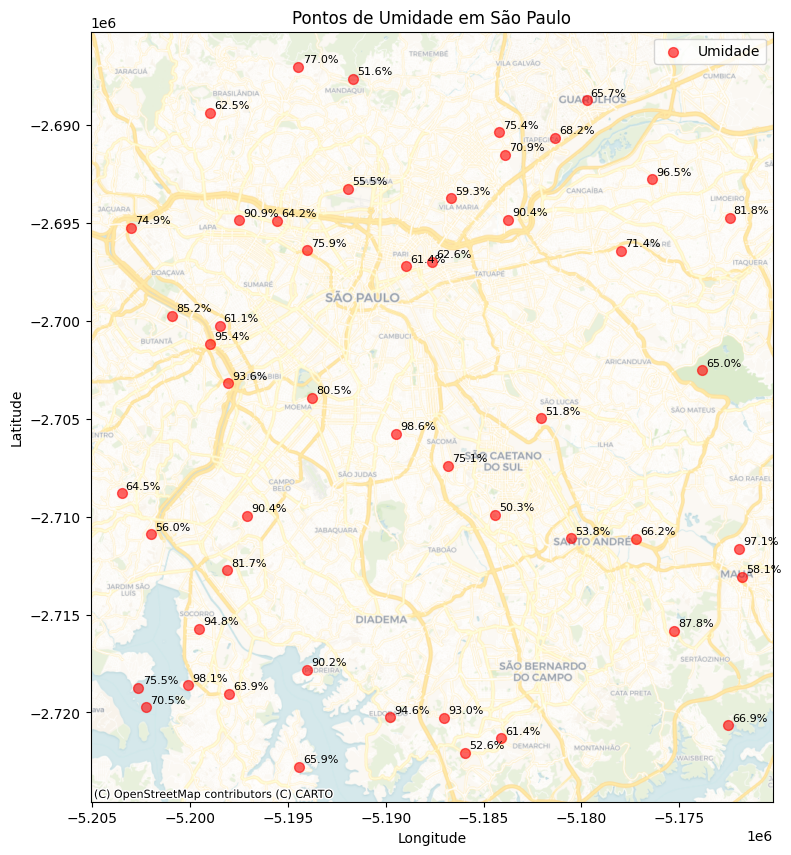

In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Passo 1: Carregar o shapefile
shapefile_path = '/content/SAD69-96_SHP_distrito.shp'
gdf_distritos = gpd.read_file(shapefile_path)

# Verificar e definir CRS se necessário
if gdf_distritos.crs is None:
    gdf_distritos.set_crs(epsg=4326, inplace=True)  # Definir CRS como WGS 84 (EPSG:4326)

# Passo 2: Criar dados de umidade aleatórios
np.random.seed(42)  # Para reprodutibilidade
num_points = 50
longitude = np.random.uniform(-46.75, -46.45, num_points)  # Longitude aproximada de São Paulo
latitude = np.random.uniform(-23.75, -23.45, num_points)  # Latitude aproximada de São Paulo
umidade = np.random.uniform(50, 100, num_points)  # Valores de umidade entre 50% e 100%

# Criar um DataFrame com os dados
df_umidade = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'umidade': umidade
})

# Passo 3: Converter o DataFrame para um GeoDataFrame
geometry = [Point(xy) for xy in zip(df_umidade.longitude, df_umidade.latitude)]
gdf_umidade = gpd.GeoDataFrame(df_umidade, geometry=geometry, crs="EPSG:4326")

# Re-projetar os GeoDataFrames para EPSG:3857 (Web Mercator)
gdf_distritos = gdf_distritos.to_crs(epsg=3857)
gdf_umidade = gdf_umidade.to_crs(epsg=3857)

# Passo 4: Criar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o shapefile dos distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os pontos de umidade
gdf_umidade.plot(ax=ax, color='red', markersize=50, alpha=0.6, label='Umidade')

for x, y, um in zip(gdf_umidade.geometry.x, gdf_umidade.geometry.y, gdf_umidade.umidade):
    ax.annotate(f'{um:.1f}%', xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')

# Adicionar basemap
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.CartoDB.VoyagerLabelsUnder)

# Ajustar o título e a legenda
plt.title('Pontos de Umidade em São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


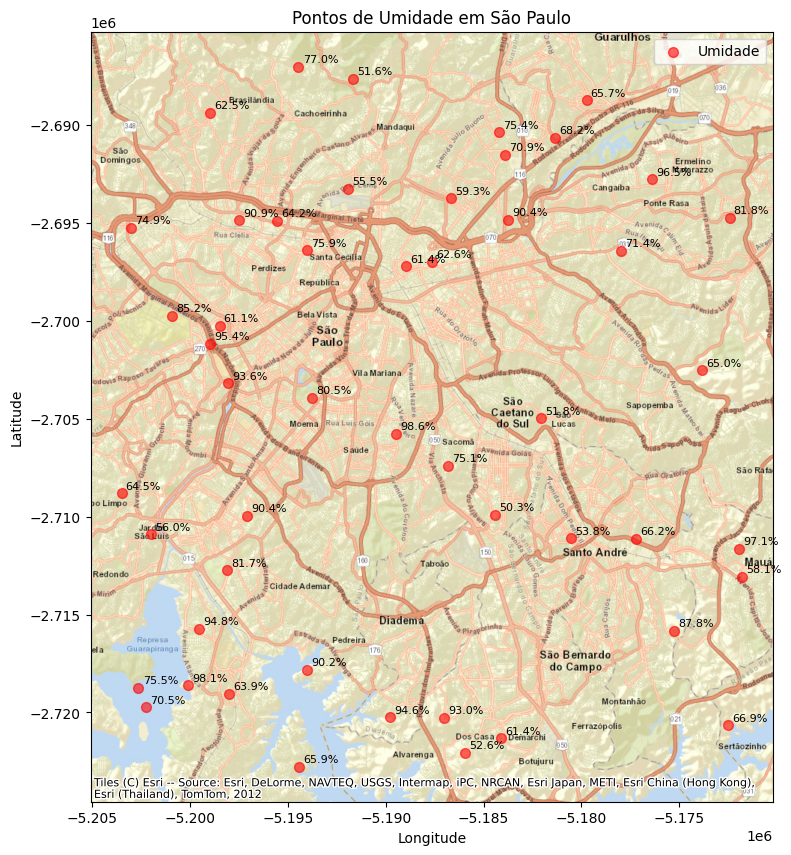

In [95]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Passo 1: Carregar o shapefile
shapefile_path = '/content/SAD69-96_SHP_distrito.shp'
gdf_distritos = gpd.read_file(shapefile_path)

# Verificar e definir CRS se necessário
if gdf_distritos.crs is None:
    gdf_distritos.set_crs(epsg=4326, inplace=True)  # Definir CRS como WGS 84 (EPSG:4326)

# Passo 2: Criar dados de umidade aleatórios
np.random.seed(42)  # Para reprodutibilidade
num_points = 50
longitude = np.random.uniform(-46.75, -46.45, num_points)  # Longitude aproximada de São Paulo
latitude = np.random.uniform(-23.75, -23.45, num_points)  # Latitude aproximada de São Paulo
umidade = np.random.uniform(50, 100, num_points)  # Valores de umidade entre 50% e 100%

# Criar um DataFrame com os dados
df_umidade = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'umidade': umidade
})

# Passo 3: Converter o DataFrame para um GeoDataFrame
geometry = [Point(xy) for xy in zip(df_umidade.longitude, df_umidade.latitude)]
gdf_umidade = gpd.GeoDataFrame(df_umidade, geometry=geometry, crs="EPSG:4326")

# Re-projetar os GeoDataFrames para EPSG:3857 (Web Mercator)
gdf_distritos = gdf_distritos.to_crs(epsg=3857)
gdf_umidade = gdf_umidade.to_crs(epsg=3857)

# Passo 4: Criar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o shapefile dos distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os pontos de umidade
gdf_umidade.plot(ax=ax, color='red', markersize=50, alpha=0.6, label='Umidade')

for x, y, um in zip(gdf_umidade.geometry.x, gdf_umidade.geometry.y, gdf_umidade.umidade):
    ax.annotate(f'{um:.1f}%', xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')

# Adicionar basemap
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.Esri.WorldStreetMap)

# Ajustar o título e a legenda
plt.title('Pontos de Umidade em São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


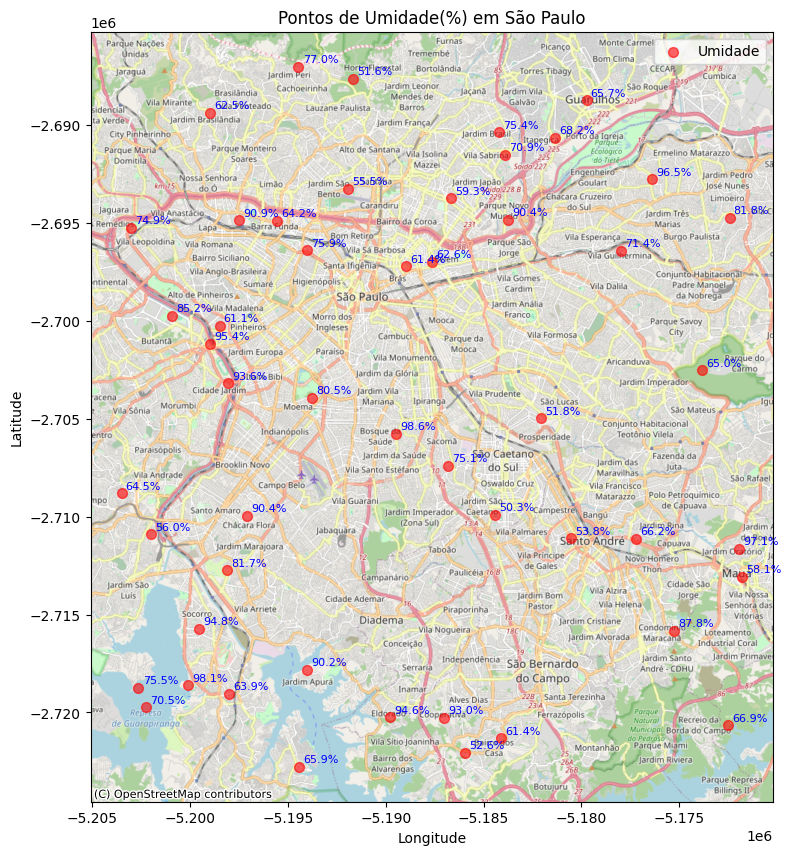

In [96]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Passo 1: Carregar o shapefile
shapefile_path = '/content/SAD69-96_SHP_distrito.shp'
gdf_distritos = gpd.read_file(shapefile_path)

# Verificar e definir CRS se necessário
if gdf_distritos.crs is None:
    gdf_distritos.set_crs(epsg=4326, inplace=True)  # Definir CRS como WGS 84 (EPSG:4326)

# Passo 2: Criar dados de umidade aleatórios
np.random.seed(42)  # Para reprodutibilidade
num_points = 50
longitude = np.random.uniform(-46.75, -46.45, num_points)  # Longitude aproximada de São Paulo
latitude = np.random.uniform(-23.75, -23.45, num_points)  # Latitude aproximada de São Paulo
umidade = np.random.uniform(50, 100, num_points)  # Valores de umidade entre 50% e 100%

# Criar um DataFrame com os dados
df_umidade = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'umidade': umidade
})

# Passo 3: Converter o DataFrame para um GeoDataFrame
geometry = [Point(xy) for xy in zip(df_umidade.longitude, df_umidade.latitude)]
gdf_umidade = gpd.GeoDataFrame(df_umidade, geometry=geometry, crs="EPSG:4326")

# Re-projetar os GeoDataFrames para EPSG:3857 (Web Mercator)
gdf_distritos = gdf_distritos.to_crs(epsg=3857)
gdf_umidade = gdf_umidade.to_crs(epsg=3857)

# Passo 4: Criar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o shapefile dos distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os pontos de umidade
gdf_umidade.plot(ax=ax, color='red', markersize=50, alpha=0.6, label='Umidade')

# Adicionar rótulos de umidade
for x, y, um in zip(gdf_umidade.geometry.x, gdf_umidade.geometry.y, gdf_umidade.umidade):
    ax.annotate(f'{um:.1f}%', xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='blue')

# Adicionar basemap
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar o título e a legenda
plt.title('Pontos de Umidade(%) em São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


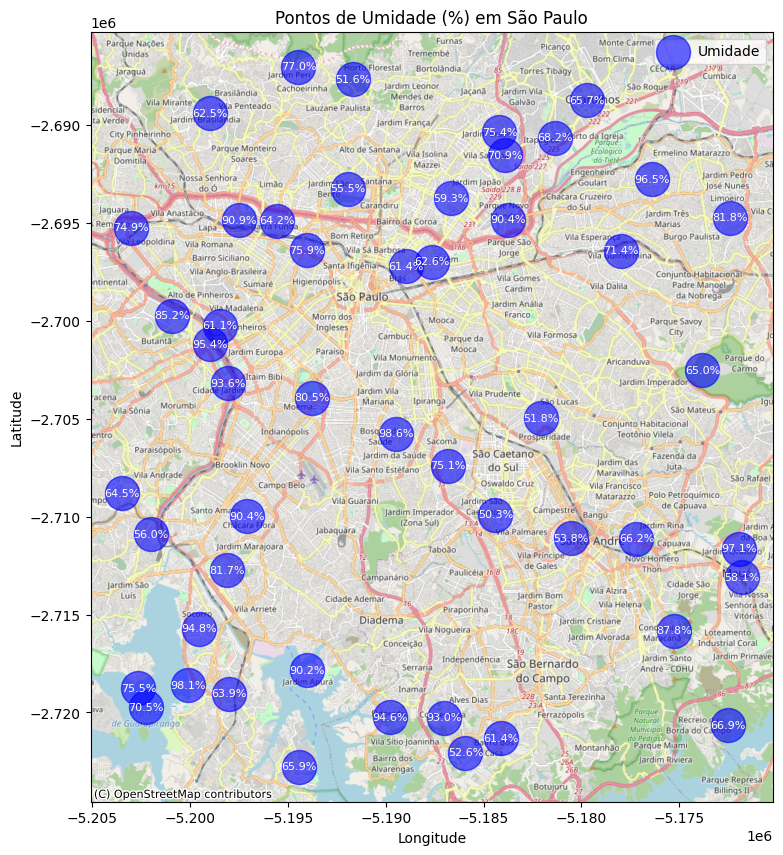

In [103]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Passo 1: Carregar o shapefile
shapefile_path = '/content/SAD69-96_SHP_distrito.shp'
gdf_distritos = gpd.read_file(shapefile_path)

# Verificar e definir CRS se necessário
if gdf_distritos.crs is None:
    gdf_distritos.set_crs(epsg=4326, inplace=True)  # Definir CRS como WGS 84 (EPSG:4326)

# Passo 2: Criar dados de umidade aleatórios
np.random.seed(42)  # Para reprodutibilidade
num_points = 50
longitude = np.random.uniform(-46.75, -46.45, num_points)  # Longitude aproximada de São Paulo
latitude = np.random.uniform(-23.75, -23.45, num_points)  # Latitude aproximada de São Paulo
umidade = np.random.uniform(50, 100, num_points)  # Valores de umidade entre 50% e 100%

# Criar um DataFrame com os dados
df_umidade = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'umidade': umidade
})

# Passo 3: Converter o DataFrame para um GeoDataFrame
geometry = [Point(xy) for xy in zip(df_umidade.longitude, df_umidade.latitude)]
gdf_umidade = gpd.GeoDataFrame(df_umidade, geometry=geometry, crs="EPSG:4326")

# Re-projetar os GeoDataFrames para EPSG:3857 (Web Mercator)
gdf_distritos = gdf_distritos.to_crs(epsg=3857)
gdf_umidade = gdf_umidade.to_crs(epsg=3857)

# Passo 4: Criar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o shapefile dos distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os pontos de umidade com bolinhas maiores
gdf_umidade.plot(ax=ax, color='blue', markersize=600, alpha=0.6, label='Umidade')  # Aumente o valor de markersize conforme necessário

# Adicionar rótulos de umidade dentro das bolinhas
for x, y, um in zip(gdf_umidade.geometry.x, gdf_umidade.geometry.y, gdf_umidade.umidade):
    ax.text(x, y, f'{um:.1f}%', fontsize=8, color='white', ha='center', va='center')

# Adicionar basemap
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar o título e a legenda
plt.title('Pontos de Umidade (%) em São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

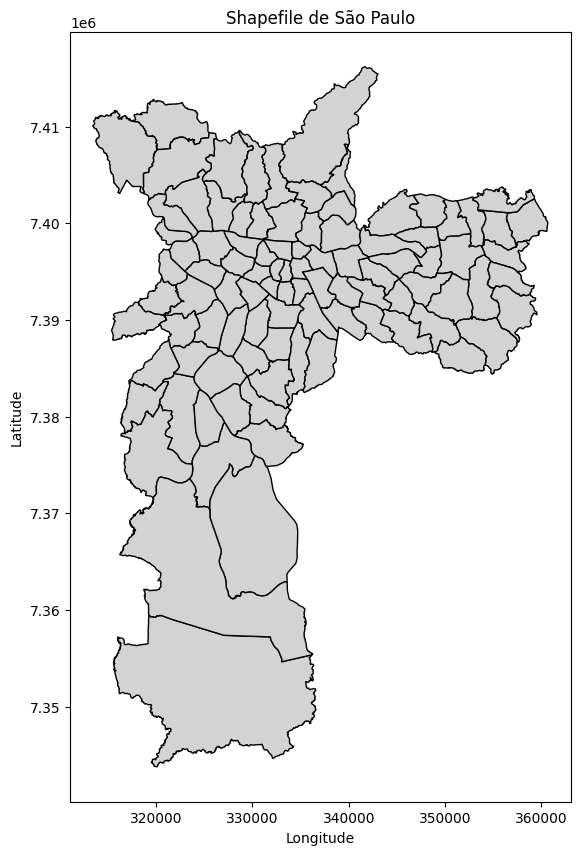

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Passo 1: Carregar o shapefile
shapefile_path = "/content/SAD69-96_SHP_distrito.shp"  # Substitua pelo caminho do seu shapefile
gdf_sp = gpd.read_file(shapefile_path)

# Passo 2: Definir o CRS se necessário (ajuste conforme o CRS do seu shapefile)
if gdf_sp.crs is None:
    gdf_sp.crs = "EPSG:4326"  # Ajuste se necessário

# Passo 3: Plotar o shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf_sp.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.title("Shapefile de São Paulo")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
